# Revisão - imagens

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.1.1 


# 1 - Leitura e filtragem linear

[Fonte da imagem](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Bauhaus_Dessau_2018.jpg/1024px-Bauhaus_Dessau_2018.jpg)

In [2]:
bau_bgr = cv2.imread("bauhaus.jpg")

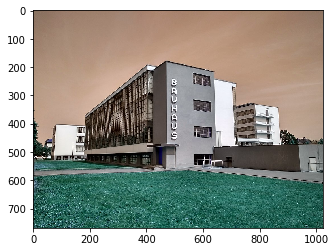

In [3]:
plt.imshow(bau_bgr)

# Formatos

In [117]:
bau_rgb = cv2.cvtColor(bau_bgr, cv2.COLOR_BGR2RGB)
bau_gray = cv2.cvtColor(bau_rgb, cv2.COLOR_RGB2GRAY)

In [118]:
bau_rgb.shape

(768, 1024, 3)

In [122]:
componente_g = bau_rgb[:,:,2]

Verificando o tipo do array nos certificamos do que já sabíamos: trata-se de um *unsigned int* de 8 bits.

In [186]:
componente_g.dtype


dtype('uint8')

Nota: a maneira padrão de descobrir o tipo de uma variável em Python é com a função `type()`. 

In [187]:
type(componente_g)

numpy.ndarray

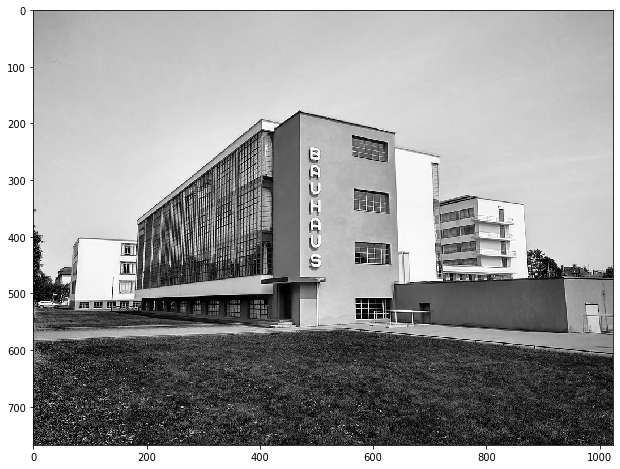

In [124]:
plt.figure(figsize=(12,8))
plt.imshow(componente_g, cmap="Greys_r", vmin=0, vmax=255)

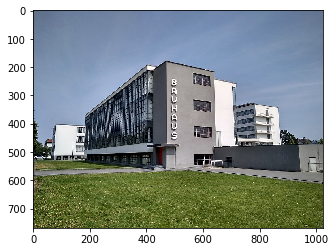

In [125]:
plt.imshow(bau_rgb)

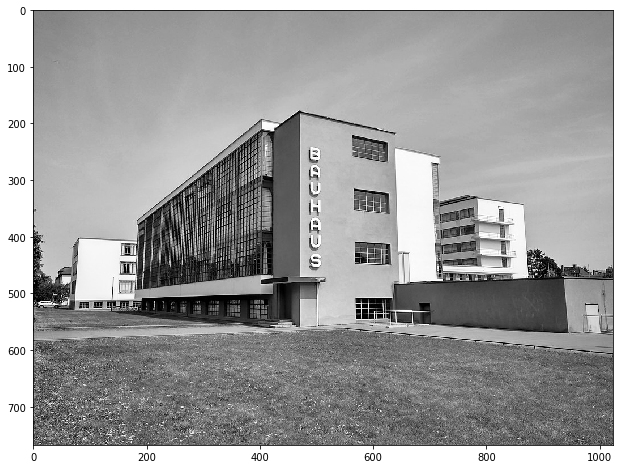

In [6]:
plt.figure(figsize=(12,8))
plt.imshow(bau_gray, cmap="Greys_r", vmin=0, vmax=255)

In [126]:
gray = bau_gray

## Kernels para filtragem linear

A função `plot_filter` abaixo é a função que aplica *qualquer* kernel de convolução 2D.

In [188]:
def plot_filter(data, kernel):
    saida = cv2.filter2D(data, ddepth=-1,  kernel=kernel)
    plt.figure(figsize=(15,8))
    plt.imshow(saida, cmap="Greys_r")
    return saida
    

Abaixo temos uma série de kernels de convolução:
* blur
* laplaciano - gradientes nas 4 direções principais
* sobelX - encontra bordas na horizontal
* solbeY - encontra bordas na vertical

In [129]:
# Fonte: https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

Descomente para ver

In [10]:
#import pandas as pd
#pd.DataFrame(smallBlur)

array([[110, 110, 110, ..., 113, 113, 113],
       [110, 110, 110, ..., 113, 113, 113],
       [110, 110, 110, ..., 113, 113, 113],
       ..., 
       [ 93,  93,  93, ...,  75,  75,  75],
       [ 93,  93,  93, ...,  75,  75,  75],
       [ 93,  93,  94, ...,  75,  75,  76]], dtype=uint8)

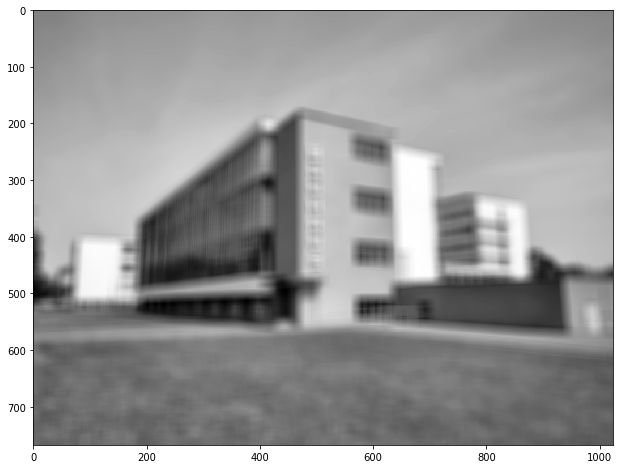

In [133]:
plot_filter(gray, largeBlur)

# Dimensões e For

Vamos recordar como se faz um *loop* para percorrer uma imagem com for.

In [136]:
gray.shape

(768, 1024)

In [137]:
output = gray.copy()

In [138]:
output[:,:]=0

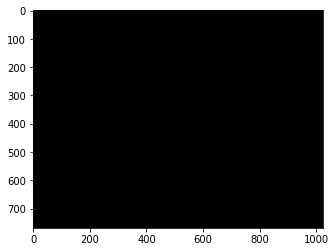

In [139]:
plt.imshow(output, cmap="Greys_r")

In [189]:
for j in range(gray.shape[0]):
    for i in range(gray.shape[1]):
        if gray[j][i] > 200:
            output[j][i] = 255

IndexError: index 935 is out of bounds for axis 0 with size 934

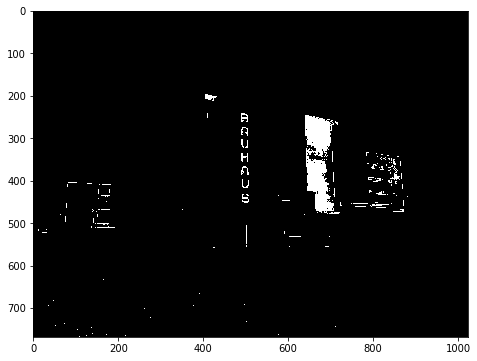

In [141]:
plt.figure(figsize=(15,6))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255)

Note que o resultado é idêntico a fazer uma limiarização

In [18]:
ret, saida_thresh = cv2.threshold(gray,200, 255, cv2.THRESH_BINARY)

Resultado da limiarização


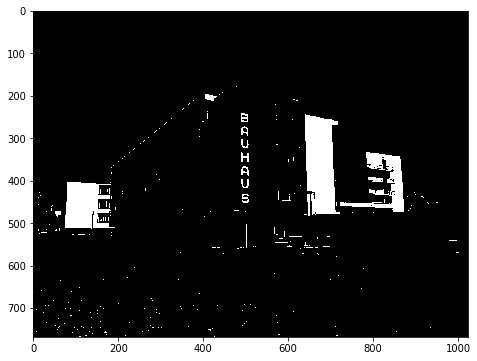

In [19]:
plt.figure(figsize=(15,6))
plt.imshow(saida_thresh, cmap="Greys_r", vmin=0, vmax=255)

Durante a aula o aluno Antonio perguntou se seria possível limiarizar uma imagem que tem canais de cores. Fizemos o teste:

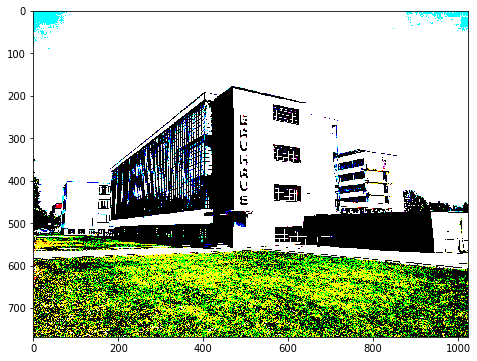

In [146]:
ret, saida_thresh_rgb = cv2.threshold(bau_rgb,100, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(18,6))
plt.imshow(saida_thresh_rgb)

# 2. Canais de cores

## Baseado no gabaritro da Q2 da P1

Esta solução pode ser vista [neste vídeo]( https://youtu.be/RUA5FVRt2f4)

O código que implementa esta solução está em [https://github.com/mirwox/prova1_2020/blob/solution/q2/q2.py](https://github.com/mirwox/prova1_2020/blob/solution/q2/q2.py)

#### O que é para fazer

Um código que plota **na tela** sobre a imagem o ponto de interseção entre as retas. 

#### Orientações

O código base para este exercício está em `q2/q2.py`. Este exercício **não precisa** de ROS

![](./figura_q2.png)

Embora cada aluno tivesse um par de interseções determinado, nós precisamos resolver para todas as interseções *possíveis*:

* Interseção R-G
* Interseção G-B
* Interseção B-R


Casos intermediários ou omissos da rubrica serão decididos pelo professor.

## Resposta

A questão pode ser resolvida via `inRange`, mas torna-se *muito mais fácil* de resolver quando notamos que os valores das retas são praticamente as componentes R (vermelha), G (verde) e B (azul) puras.


Vamos começar realizando a análise sobre um *frame* para em seguida copiar o código para o arquivo *Python*:

In [20]:
def multiplot(imgs, legenda):
    """ Função que plota n imagens BGR em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
        return
    for i in range(len(imgs)):
        axes[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
        
def multiplot_gray(imgs, legenda):
    """ Função que plota n imagens grayscale em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0],  vmin=0, vmax=255, cmap="Greys_r"))
        return
    for i in range(len(imgs)):
        axes[i].imshow(imgs[i], vmin=0, vmax=255, cmap="Greys_r")

In [21]:
from __future__ import print_function, division

import cv2
import numpy as np
import imlib
import os
import os.path
import matplotlib.pyplot as plt
import math

%matplotlib inline

print("Versao da Cv2 ", cv2.__version__)
import sys
print("Versao do Python", sys.version)

Versao da Cv2  4.1.1
Versao do Python 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


### Visualizando os canais R, G e B

In [22]:
frame_bgr = cv2.imread("lines.png")
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

R = frame[:,:,0]
G = frame[:,:,1]
B = frame[:,:, 2]

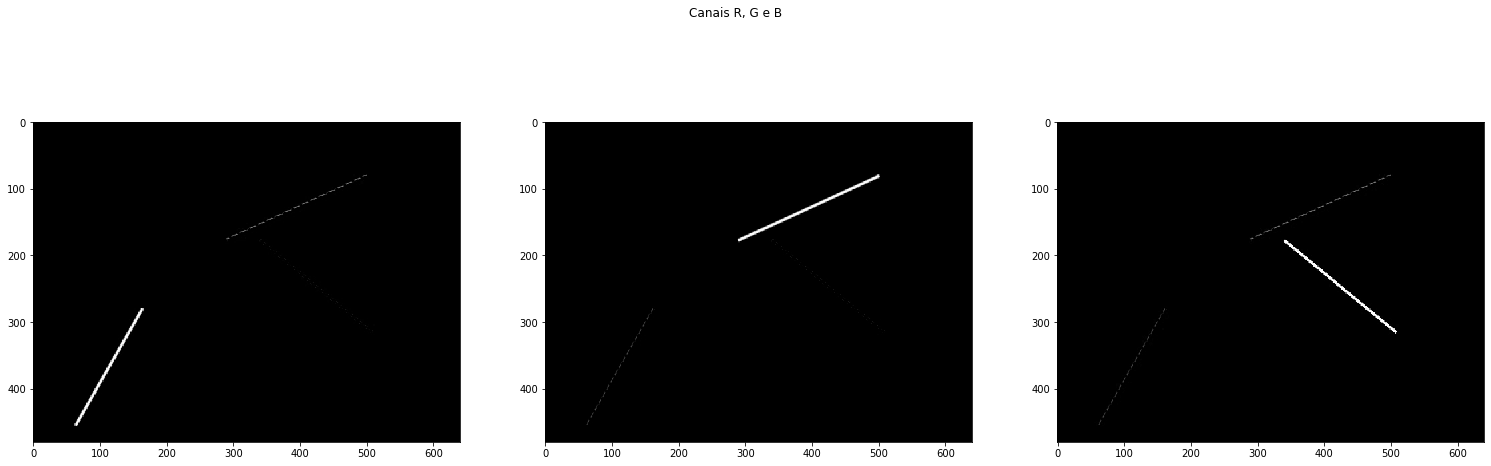

In [23]:
multiplot_gray([R, G, B], "Canais R, G e B")

Apesar de o contraste estar muito bom, ainda não é perfeito. Notam-se alguns traçoes em cinza. Vamos recorrer à função cv2. threshold que foi vista na aula 2.

In [24]:
ret, R2 = cv2.threshold(R, 200, 255, cv2.THRESH_BINARY) # OTSU

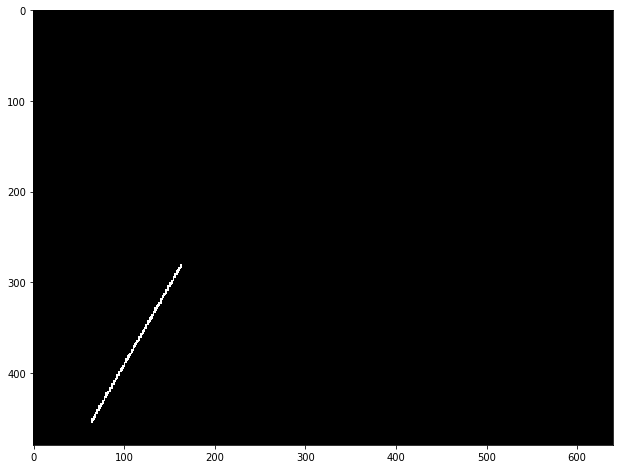

In [25]:
plt.figure(figsize=(12,8))
plt.imshow(R2, cmap="Greys_r", vmin=0, vmax=255)

In [26]:
ret, G2 = cv2.threshold(G, 200, 255, cv2.THRESH_BINARY)

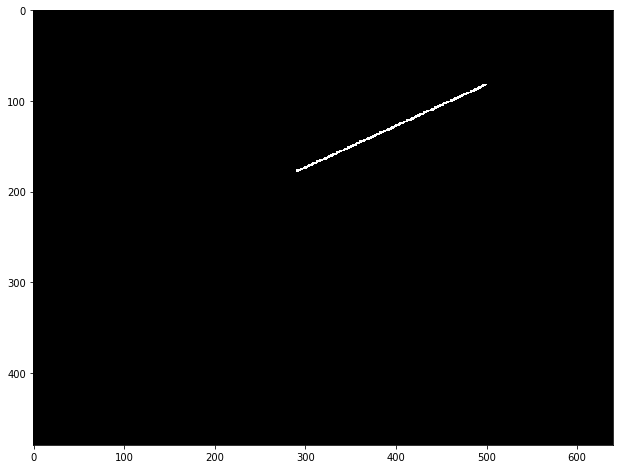

In [27]:
plt.figure(figsize=(12,8))

plt.imshow(G2, cmap="Greys_r", vmin=0, vmax=255)

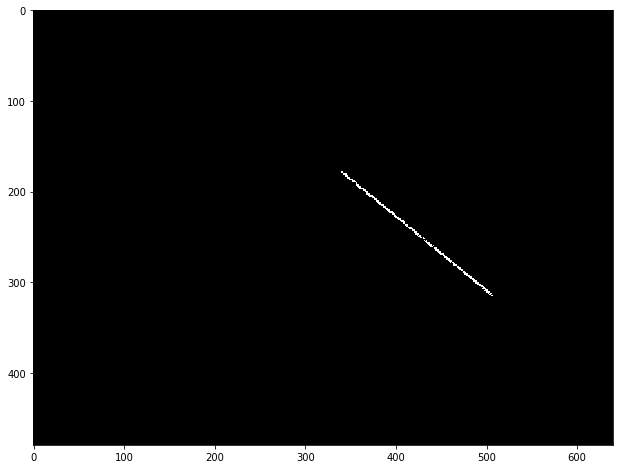

In [28]:
ret, B2 = cv2.threshold(B, 250, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,8))
plt.imshow(B2, cmap="Greys_r", vmin=0, vmax=255)

### Aplicando HoughLines

In [29]:
filtradas_rgb = [R2, G2, B2]

Vamos também usar o HoughLines usando o código da aula 2, realizando uma modificação para *guardar* os segmentos de reta encontrados.

In [30]:

seg_r = []
seg_g = []
seg_b = []

segs = [seg_r, seg_g, seg_b]

def do_houghlines(img, output,  color, seg):
    lines = cv2.HoughLinesP(image=img, rho=10, theta=math.pi/180.0, threshold=253, lines=np.array([]), minLineLength=70, maxLineGap=2)
    a,b,c = lines.shape
    for i in range(a):
        # Faz uma linha ligando o ponto inicial ao ponto final, com a cor vermelha (BGR)
        cv2.line(output, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), color, 1, cv2.LINE_AA)
        # Guarda aquele segmento
        seg.append(((lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3])))

In [31]:
out = frame.copy()
out[:,:,:] = 0 # Criamos uma imagem em branco igual à de entrada

# tuplas de cores
r_color = (255,0,0)
g_color = (0,255,0)
b_color = (0,0,255)

colors = [r_color, g_color, b_color]
segs = [seg_r, seg_g, seg_b]

In [32]:
for i in range(len(filtradas_rgb)):
    do_houghlines(filtradas_rgb[i], out, colors[i], segs[i])

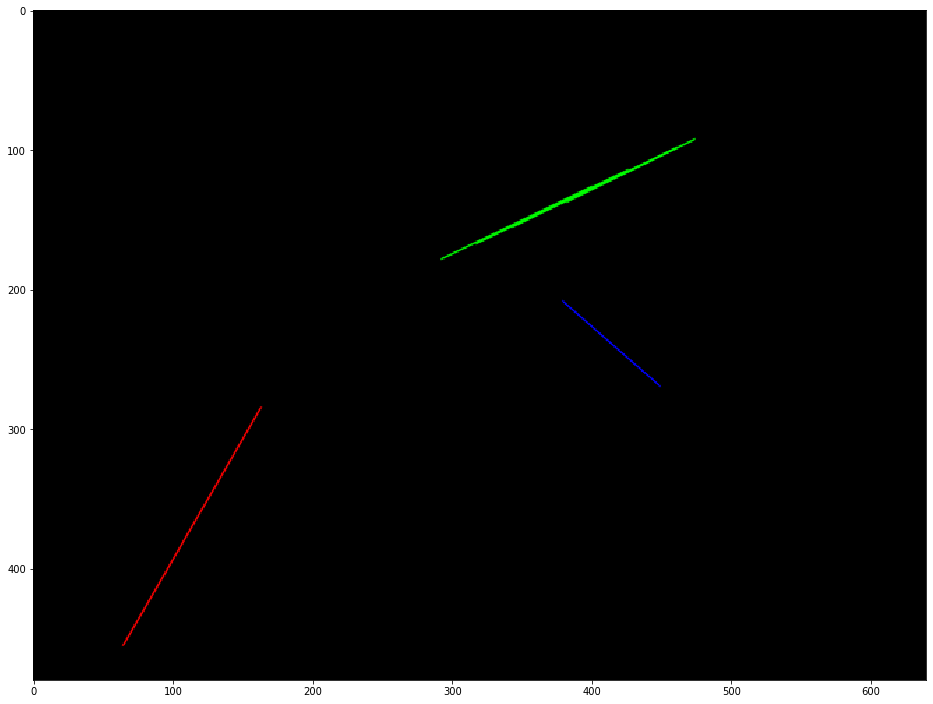

In [33]:
plt.figure(figsize=(16,19))
plt.imshow(out)

### Impressão dos segmentos encontrados por Hough

In [34]:
names = ["red", "green", "blue"]

In [35]:
for i in range(len(names)):
    print(names[i])
    for s in segs[i]:
        print(s)

red
((64, 455), (163, 284))
green
((343, 155), (461, 98))
((292, 178), (400, 126))
((317, 167), (426, 114))
((382, 137), (474, 92))
blue
((379, 208), (449, 269))


# 3. InRange e cores

Este *notebook* é parte da resposta da Q1 da prova. Está no gabarito

A questão pede que identiquemos os cães amarelos ou magentas quando estiverem sobre a cadeira.

Vamos usar a técnica mais direta, que consiste em color pickers.


<img src="dogs_nada.png">

In [36]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import sys
import math
print ("OpenCV Version : %s " % cv2.__version__)

from ipywidgets import widgets, interact, interactive, FloatSlider, IntSlider

import auxiliar as aux

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(aux) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(aux)


OpenCV Version : 4.1.1 
Este script não deve ser executado diretamente
Este script não deve ser executado diretamente


In [37]:

### Leitura de imagens demo - nada disso precisa ser feito na prova
q1_img_names = "dogs_nada.png  dogs_pink.png  dogs_yellow.png".split()
q1_img = [cv2.imread(filename) for filename in q1_img_names]
hsv_img = [cv2.cvtColor(i, cv2.COLOR_BGR2HSV) for i in q1_img]
rgb_img = [cv2.cvtColor(i, cv2.COLOR_BGR2HSV) for i in q1_img]

def multiplot(imgs, legenda):
    """ Função que plota n imagens BGR em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
        return
    for i in range(len(imgs)):
        axes[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
        
def multiplot_gray(imgs, legenda):
    """ Função que plota n imagens grayscale em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0],  vmin=0, vmax=255, cmap="Greys_r"))
        return
    for i in range(len(imgs)):
        axes[i].imshow(imgs[i], vmin=0, vmax=255, cmap="Greys_r")

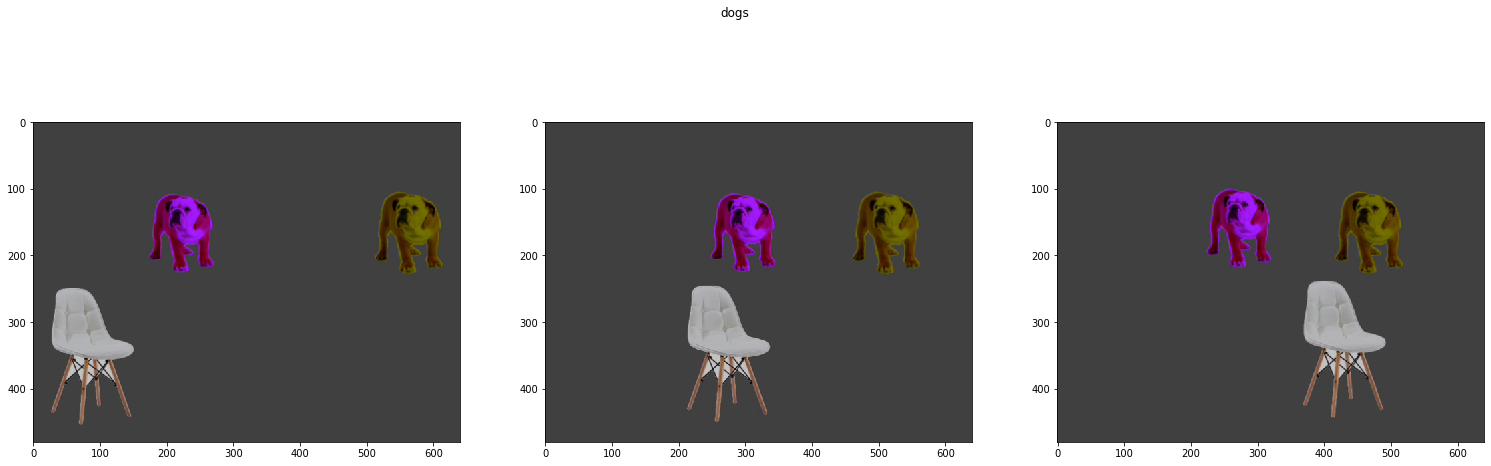

In [38]:
multiplot(q1_img, "dogs")

In [39]:
colorpicker = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#9a15f3',
    disabled=False
)

# Magenta

In [40]:
colorpicker

ColorPicker(value='#9a15f3', description='Escolha uma cor')

In [41]:
hsv1, hsv2 = aux.ranges(colorpicker.value)

In [42]:
from numpy import array, uint8

In [43]:
repr(hsv1)

'array([128,  50,  50], dtype=uint8)'

In [44]:
repr(hsv2)

'array([138, 255, 255], dtype=uint8)'

In [45]:
mask_magenta = [cv2.inRange(img, hsv1, hsv2) for img in hsv_img]

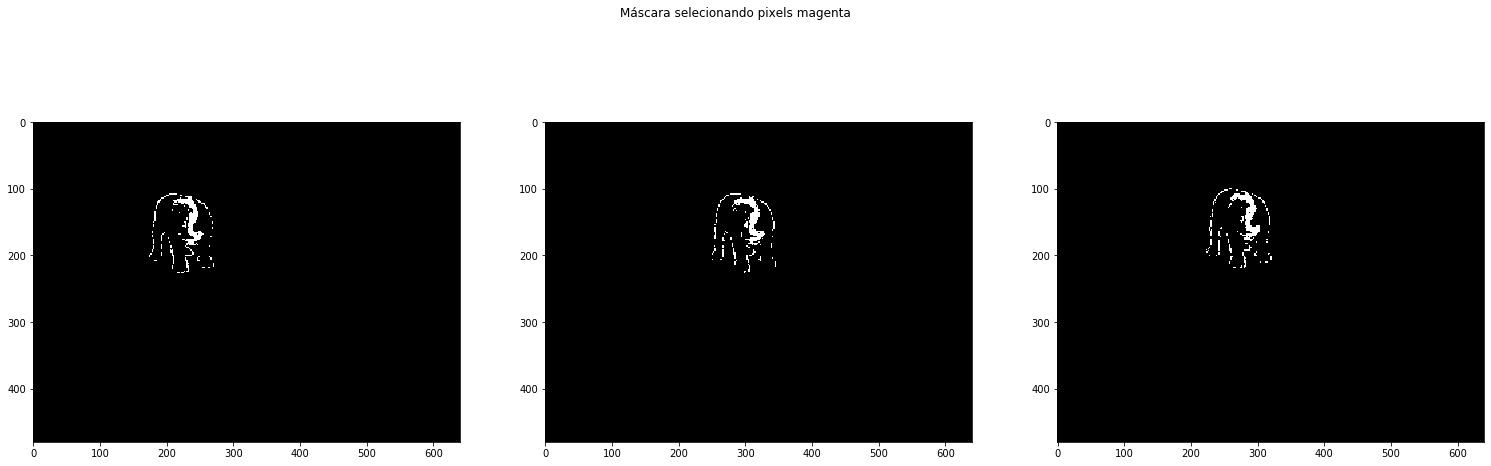

In [46]:
multiplot_gray(mask_magenta, "Máscara selecionando pixels magenta")

# Amarelo

In [47]:
colorpicker2 = widgets.ColorPicker(
    concise=False,
    description='Escolha uma cor',
    value='#807c00',
    disabled=False
)

In [48]:
colorpicker2

ColorPicker(value='#807c00', description='Escolha uma cor')

In [49]:
hsv1y, hsv2y = aux.ranges(colorpicker2.value)

In [50]:
from numpy import array, uint8

In [51]:
repr(hsv1y)

'array([19, 50, 50], dtype=uint8)'

In [52]:
repr(hsv2y)

'array([ 29, 255, 255], dtype=uint8)'

In [53]:
mask_yellow = [cv2.inRange(img, hsv1y, hsv2y) for img in hsv_img]

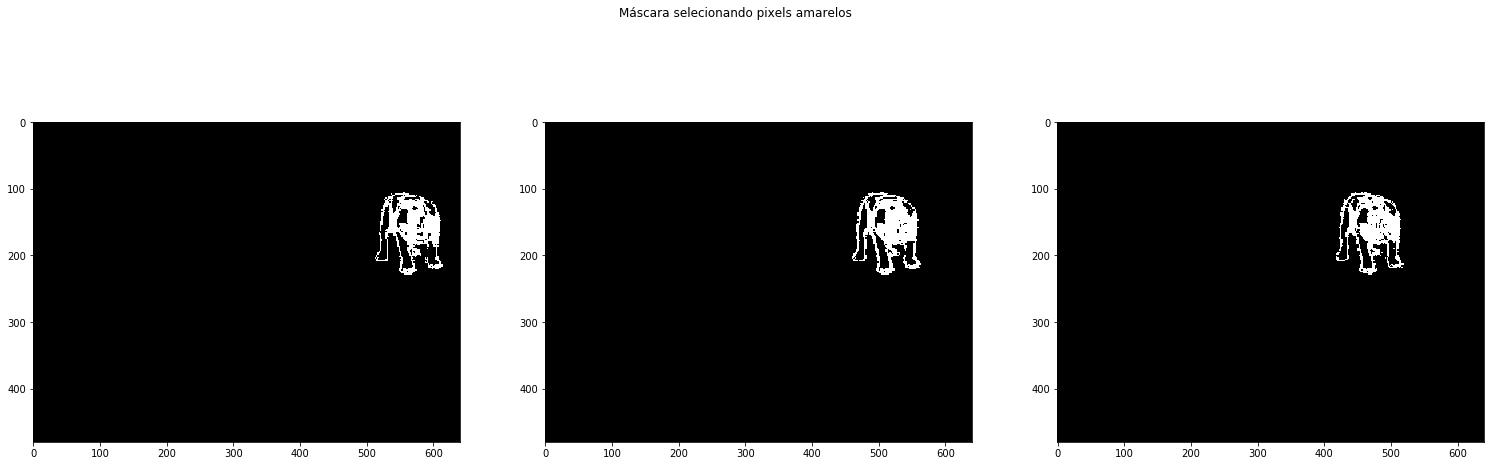

In [54]:
multiplot_gray(mask_yellow, "Máscara selecionando pixels amarelos")

### Considerações importantes

Note que *nenhum* pixel pertence a ambos os cães com nenhuma das máscaras que realizamos. Isso vai ser importante quando formos tentar identificar se um cachorro é magenta ou amarelo.



# 4. Contornos

# Exemplo de deteção de contornos e Hough Circles

Este é um exemplo de deteção de contornos e de círculos em que os *defaults* falharam e foi preciso fazer vários ajustes.

Neste exemplo vamos tentar 2 abordagems:

* Melhorando os valores do `inRange` e fazendo o *fine tuning* das imagens subsequentes
* Introduzindo operadores morfológicos de dilatação e erosão

### Conteúdo

[Imagem de testes e cor do color picker](#img_inicial)

[Problemas com a filtragem simples](#problemas)

[Análise dos canais H, S e V](#analise_canais)

[Novos valores para o inRange](#novos_inrange)

[Blur para fechar pontos falhos](#blur)

[Deteção de contornos e centro de massa](#contornos)

[Centro de massa de um contorno](#centro_massa)

[Transformada de Hough Circles](#hough_circles)

[Limiarização para melhorar Hough Circles](#limiarizacao)

[Valor do acumulador dp de Hough Circles](#acumulador_dp)

[Alternativa com operadores morfológicos](#morfologia)

[Conclusão](#conclusao)



## Imports

In [55]:
import auxiliar as aux
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils #pip install imutils
import os

%matplotlib inline

Versão da OpenCV

In [56]:
cv2.__version__

'4.1.1'

Diretório de trabalho:

In [57]:
print(os.getcwd())

/home/borg/src/revisao2020


<a id="img_inicial"></a>

## Imagem de testes

Vamos praticar alguns conceitos vistos na imagem abaixo

<img src=stars.png width=50%>

## Usando as cores vindas do color picker

Usando um *color picker* idêntico ao que consta no arquivo [aula2_OpenCV_Filtragem.ipynb](aula2_OpenCV_Filtragem.ipynb) obtivemos:

```python

    cor_rgb = "#fdb22b"
```    

In [58]:
cor_rgb = "#fdb22b"

In [59]:
cor1, cor2 = aux.ranges(cor_rgb)

In [60]:
cor1

array([ 9, 50, 50], dtype=uint8)

In [61]:
cor2

array([ 19, 255, 255], dtype=uint8)

Vamos ler a imagem, converter em HSV e ver como ficou a filtragem

In [62]:
img_bgr = cv2.imread("stars.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

<a id="problemas"></a>
    

## Problemas com a filtragem simples

In [63]:
mascara = cv2.inRange(img_hsv, cor1, cor2)

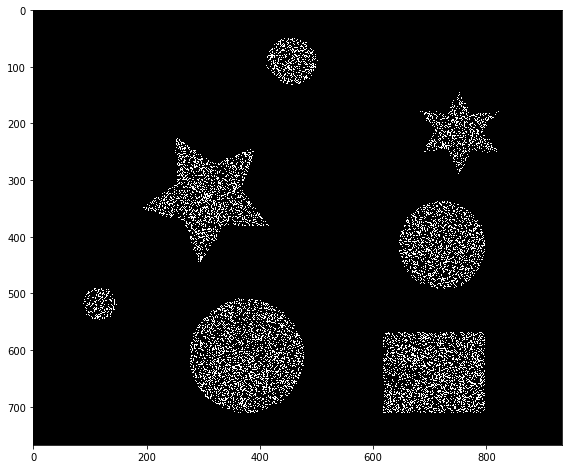

In [147]:
plt.figure(figsize=(18,8))
plt.imshow(mascara, cmap="Greys_r", vmin=0, vmax=255)

A imagem acima nos mostra que a filtragem **não ficou muito boa**. Isso é um sinal de que precisamos tentar melhorar o resultado do `inRange`. Ou seja, precisamos mexer nos valores HSV das variáveis `cor1` e `cor2` que vieram do `aux.ranges` .

Podemos tentar usar tentativa e erro, ou podemos tentar fazer um *histograma* para entender onde nossa máscara não ficou boa.

Na aula 1 vimos como fazer um histograma. As funções abaixo foram baseadas no exemplo de histograma dado naquela aula

<a id="analise_canais"></a>

## Análise dos canais

Vamos usar seguidamente as funções a seguir para mostrar os canais H, S e V separadamente e também as imagens com cada canal em isolamento.

Estas funções são baseadas no material da aula 1.

In [65]:
def hsv_hists(img, plt):
    """
        Plota o histograma de cada um dos canais HSV
        img - imagem HSV
        plt - objeto matplotlib
    """
    plt.figure(figsize=(20,10)); 
    img_h = img[:,:,0]
    img_s = img[:,:,1]
    img_v = img[:,:,2]
    histo_plot(img_h, "r","H", plt);
    histo_plot(img_s, "g","S", plt);
    histo_plot(img_v, "b","V", plt);

def make_hist(img_255, c, label, plt):
    """ img_255 - uma imagem com 3 canais de 0 até 255
        c a cor do plot
        label - o label do gráfico
        plt - matplotlib.pyplot
    """
    hist,bins = np.histogram(img_255.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    # plt.plot(cdf_normalized, color = c)
    plt.hist(img_255.flatten(),256,[0,256], color = c)
    plt.xlim([0,256])
    plt.legend(label, loc = 'upper left')
    plt.plot()

def histo_plot(img, cor, label, plt):
    """
        img - imagem
        cor - cor
        plt - matplotlib.pyplot object

    """
    plt.figure(figsize=(10,5))
    make_hist(img, cor, label, plt)
    plt.show()
    plt.figure(figsize=(10,5))
    plt.imshow(img, cmap="Greys_r")#, vmin=0, vmax=255)    
    plt.title(label)


Vamos agora usar as funções acima para fazer um histograma e ver a imagem em cada um dos canais

<Figure size 1440x720 with 0 Axes>

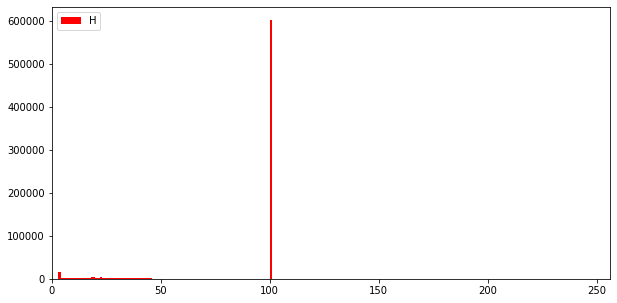

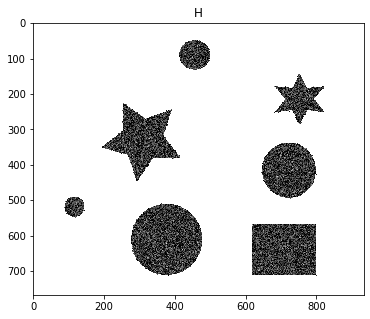

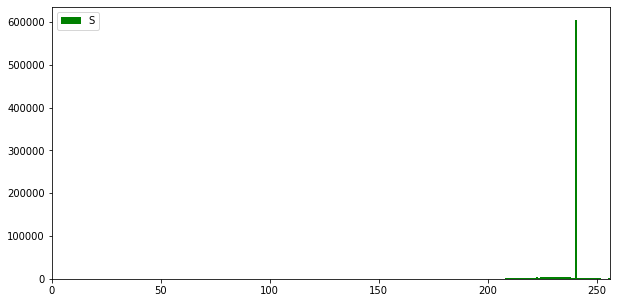

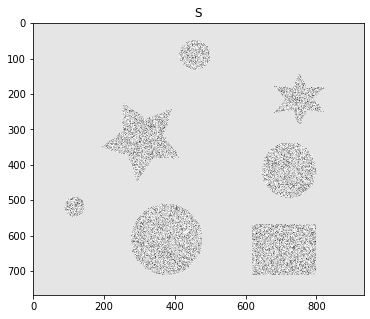

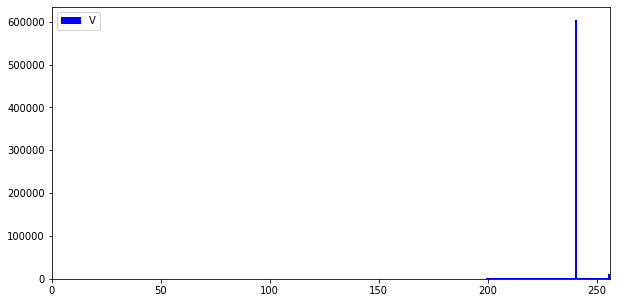

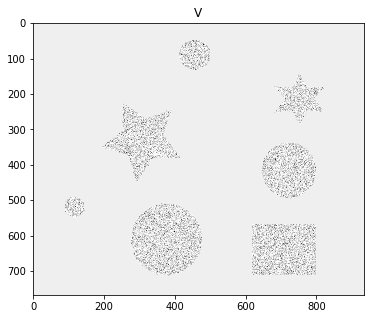

In [66]:
hsv_hists(img_hsv, plt)

<a id="novos_inrange"></a>

## Novos valores para o inRange

Agora é importante analisar de forma **crítica** os valores gerados pelo comando `aux.ranges` levando em conta o histograma apresentado anteriormente. Relembrando os valores vindos do *color picker*:

In [67]:
cor1

array([ 9, 50, 50], dtype=uint8)

In [68]:
cor2

array([ 19, 255, 255], dtype=uint8)

Notemos que a componente *H* gerada pelo `aux.ranges` está contida na faixa $[9,19]$, entretanto uma análise desta componente nos histogramas acima mostra:

* uma grande concentração acima do $50$
* a imagem do fundo azulado aparece mais clara no canal *H*, indicando que os pixels azuis são esta grande concentração acima do 50.
* uma concentração bem menor espalhada aproximadamente na faixa $[0,40]$
* A imagem do canal *H* mostra que os pixels das figuras são mais escuros neste canal. Provavelmente são as figuras que estão entre $0$ e $40$

A conclusão a que chegamos é que precisamos de uma faixa *H* para o `inRange` um pouco mais abrangente. Vamos tentar com os valores abaixo.

**Observe como se declaram arrays do numpy com o tipo adequado**

Basta incluir a especificação do pacote `np` antes de `np.array` e `np.uint8`.

In [153]:
cor1_v2 = np.array([ 0, 50, 50], dtype=np.uint8)
cor2_v2 = np.array([ 45, 255, 255], dtype=np.uint8)

Vamos agora aplicar as novas faixas para obter uma nova máscara

In [154]:
mascara_2 = cv2.inRange(img_hsv, cor1_v2, cor2_v2)

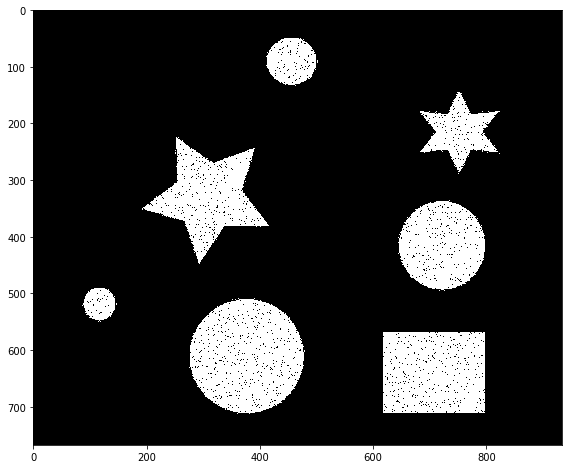

In [155]:
plt.figure(figsize=(18,8))
plt.imshow(mascara_2, cmap="Greys_r", vmin=0, vmax=255);

**Sucesso!** Note que a filtragem ficou bem melhor agora

Ainda assim há pequenos furinhos na imagem. Podemos tentar eliminá-los com um pouco de *blur* ou [operações morfológicas](#morfologia)

## Blur para fechar pontos falhos

Vamos aplicar o *blur*:

In [156]:
mascara_blur = cv2.blur(mascara_2, (3,3))

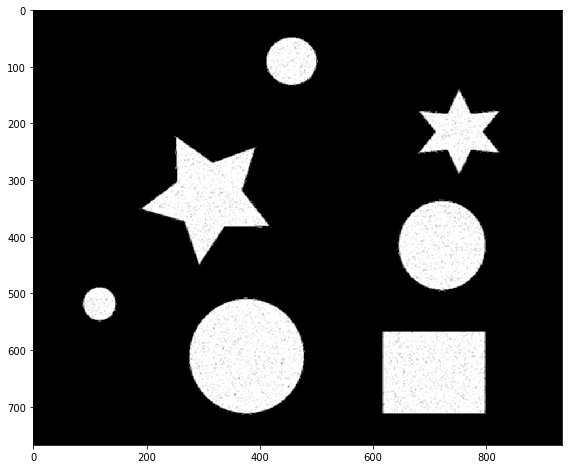

In [157]:
plt.figure(figsize=(18,8))

plt.imshow(mascara_blur, cmap="Greys_r", vmin=0, vmax=255);

Podemos notar que fomos bem-sucedidos. O *blur* ajudou a fechar os furos.

Podemos passar agora à deteção de contornos e círculos

In [158]:
mask = mascara_blur

<a id="contornos"></a>

## Deteção de contornos e cálculo do centro de massa

Vamos aplicar uma deteção de contornos igual ao exemplo da aula 2

In [159]:
contornos, arvore = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

Precisamos criar uma cópia da máscara para fins de desenho:

In [160]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"


Vamos verificar os contornos detectados

In [161]:
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

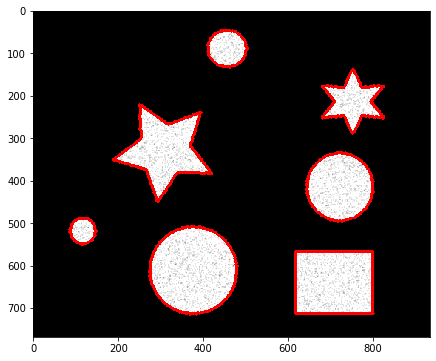

In [162]:
plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

<a id="centro_massa"></a>

### Centro de massa de um contorno

Muitas vezes é útil sabermos qual é o *centro de massa* de um contorno. Para esta finalidade vamos definir a função a seguir:

In [163]:
def center_of_contour(contorno):
    """ Retorna uma tupla (cx, cy) que desenha o centro do contorno"""
    M = cv2.moments(contorno)
    # Usando a expressão do centróide definida em: https://en.wikipedia.org/wiki/Image_moment
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (int(cX), int(cY))
    
def crosshair(img, point, size, color):
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,5)
    cv2.line(img,(x,y - size),(x, y + size),color,5)
    
font = cv2.FONT_HERSHEY_SIMPLEX

def texto(img, a, p):
    """Escreve na img RGB dada a string a na posição definida pela tupla p"""
    cv2.putText(img, str(a), p, font,1,(0,50,100),2,cv2.LINE_AA)
    
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

Vamos percorrer a lista de contornos e aplicar as funções de centro de massa definidas acima

In [164]:
for c in contornos:
    a = cv2.contourArea(c) # área
    p = center_of_contour(c) # centro de massa
    crosshair(contornos_img, p, 20, (128,128,0))
    texto(contornos_img, np.round(a,2),p)
    



Vamos verificar e desenhar o centro dos contornos e a área de cada círculo próxima de si.

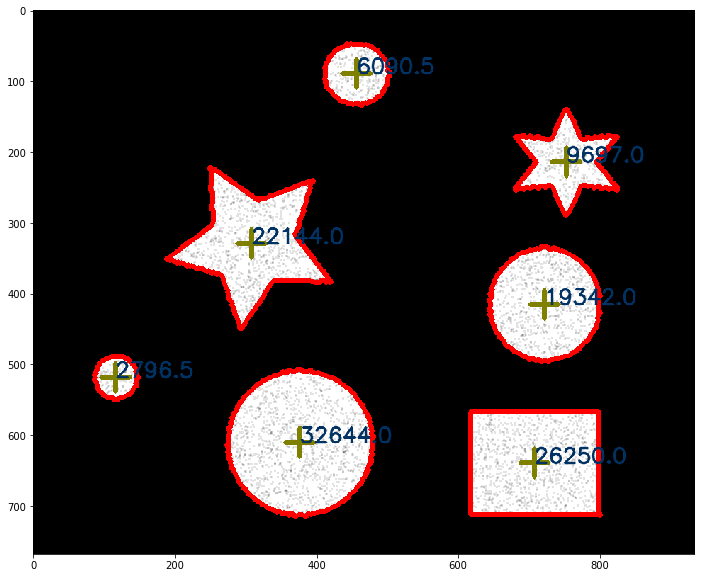

In [165]:
plt.figure(figsize=(14,10))

plt.imshow(contornos_img);

<a id="hough_circles"></a>

## Transformada de Hough Circles

Vamos tentar aplicar a transformada de Hough Circles avaliando os valores mais adequados para a distância entre círculos detectados e quais são seus tamanhos mínimos e máximos.

In [166]:
bordas = auto_canny(mask)
circles=cv2.HoughCircles(image=bordas,method=cv2.HOUGH_GRADIENT,dp=1.5,minDist=40,param1=200,param2=100,minRadius=5,maxRadius=200)
bordas_rgb = cv2.cvtColor(bordas, cv2.COLOR_GRAY2RGB)
output = bordas_rgb

if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

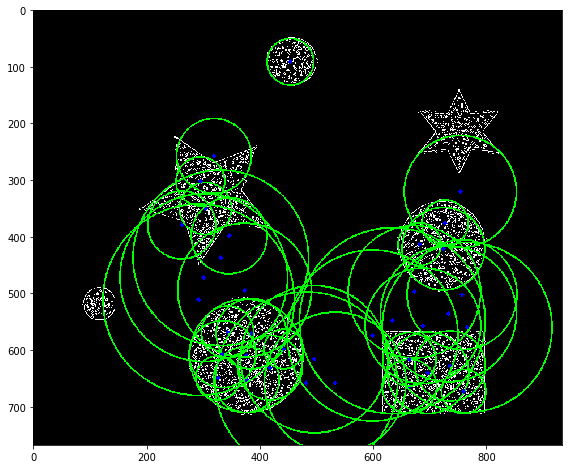

In [167]:
plt.figure(figsize=(18,8))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255)

Podemos notar que o resultado acima **ficou ruim**. Há muitos falsos positivos que foram detectados nas bordas internas do contorno.

Isso se deve ao fato de a máscara, usada, mesmo após o *blur*, ter pixels mais escuros em seu interior. 

Vamos recordar:

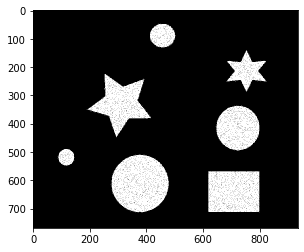

In [168]:
plt.imshow(mask_rgb)

<a id="limiarizacao"></a>

### Limiarização para melhorar Hough Circles

Vamos aplicar uma *limiarização* - valores abaixo *grayscale* de $100$ serão convertidos para zero e valores maiores serão transformados em branco.

In [169]:
retorno, mask_limiar = cv2.threshold(mask, 100 ,255, cv2.THRESH_BINARY)

Observemos o resultado da limiarização. Notamos que ficou uma imagem binária que define bem as formas.

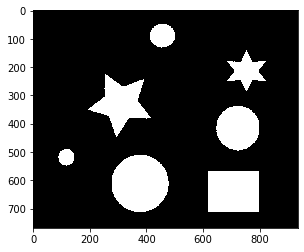

In [170]:
plt.imshow(mask_limiar, cmap="Greys_r", vmin=0, vmax=255)

## HoughCircles novamente

Agora que temos a imagem acima, vamos tentar novamente aplicar a transformada de Hough para círculos.

In [171]:

bordas = auto_canny(mask_limiar)
circles=cv2.HoughCircles(image=bordas,method=cv2.HOUGH_GRADIENT,dp=1.5,minDist=40,param1=50,param2=100,minRadius=5,maxRadius=200)
mask_limiar_rgb = cv2.cvtColor(mask_limiar, cv2.COLOR_GRAY2RGB)
bordas_rgb = cv2.cvtColor(bordas, cv2.COLOR_GRAY2RGB)

output =  bordas_rgb

if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

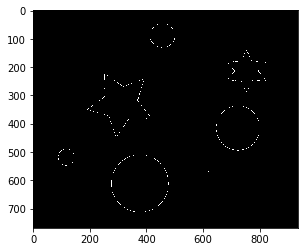

In [172]:
plt.imshow(output)

<a id="acumulador_dp"></a>

### Valor do acumulador dp de Hough Circles

Notemos que na imagem acima os círculos ainda não foram detectados.

Uma hipótese para este fenômeno é que as bordas estão muito tênues e portanto o algoritmo não as pegou. 

Vamos tentar alterar os parâmetros da função `cv2.HoughCircles`. 

O parâmetro *dp* diz respeito à relação entre o tamanho da imagem e o tamanho do acumulador.

Para obter o resultado abaixo testamos um acumulador entre $2$ e $4$ e o valor de $2.5$ deu bons resultados.

In [173]:
bordas = auto_canny(mask_limiar)
circles=cv2.HoughCircles(image=bordas,method=cv2.HOUGH_GRADIENT,dp=2.5,minDist=40,param1=50,param2=100,minRadius=5,maxRadius=150)
mask_limiar_rgb = cv2.cvtColor(mask_limiar, cv2.COLOR_GRAY2RGB)
bordas_rgb = cv2.cvtColor(bordas, cv2.COLOR_GRAY2RGB)

output =  bordas_rgb

if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

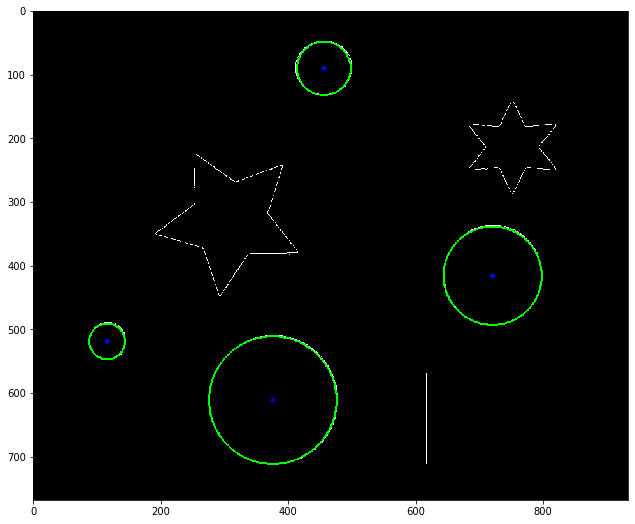

In [174]:
plt.figure(figsize=(12,9))
plt.imshow(output)

Note que uma vez encontrados os círculos, podemos usar as informações de onde ficam seus centros e raios para realizar as operações de que necessitamos.

<a id="morfologia"></a>

## Alternativa com operadores morfológicos

Vamos substituir as três etapas: melhoria da máscara, eliminação de ruído feita com blur e alteração da resolução para o Hough Circles funcionar por operações morfológicas.

Recordemos como a imagem aparecia logo após o `inRange` inicial


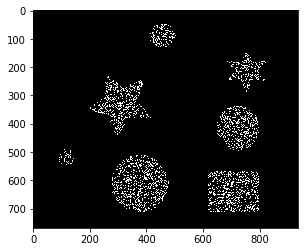

In [175]:
plt.imshow(mascara, cmap="Greys_r", vmin=0, vmax=255)

### Limpeza via operações morfológicas

Vamos usar as operações morfológica de *abertura*.  Esta operação preenche todos os buracos menores que um dado `kernel`e depois corrói suas bordas com outro `kernel`. 

In [176]:
kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
cruz = ((0,1,0),(1,1,1),(0,1,0))
kernel_erode = np.array(cruz,np.uint8)



Vamos ver como ficam os *kernels* de dilatação e erosão, que são uma elipse e uma cruz, respectivamente

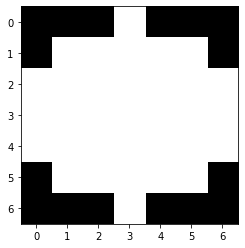

In [177]:
plt.imshow(kernel_dilate, cmap = "Greys_r")

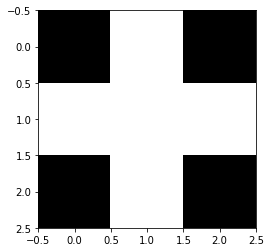

In [178]:
plt.imshow(kernel_erode, cmap="Greys_r")

In [179]:
morphology_dilate = cv2.dilate(mascara, kernel_dilate)#, iterations=2)

In [180]:
morphology_erode = cv2.erode(morphology_dilate, kernel_erode)

Na Figura a seguir vemos na parte **esquerda** o resultado da dilatação e na **direita** o resultado da erosão.

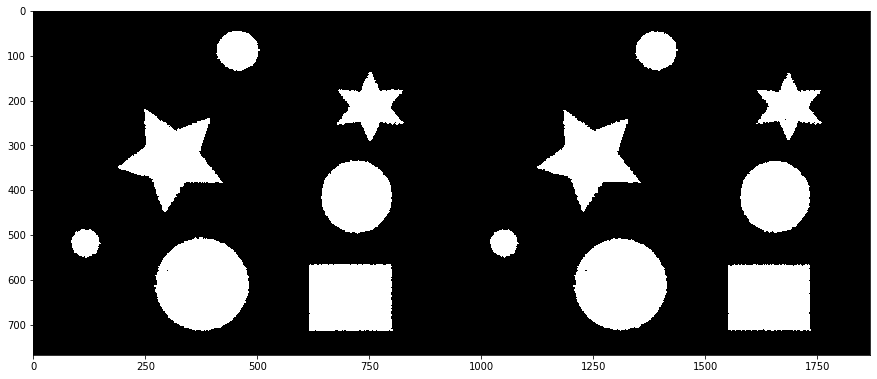

In [181]:
plt.figure(figsize=(15,12))
plt.imshow(np.hstack((morphology_dilate, morphology_erode)), cmap="Greys_r")

Para fins de testes, vamos fazer uma deteção de hough circles sobre o resultado. Note que também foi preciso mexer um pouco no valor *dp* do acumulador (usamos $2.5$ em vez de $2.0$)

In [182]:
morphology_erode_rgb = cv2.cvtColor(morphology_erode, cv2.COLOR_GRAY2RGB)

In [183]:
bordas_morph = auto_canny(morphology_erode)
bordas_morph_rgb = cv2.cvtColor(bordas_morph, cv2.COLOR_GRAY2RGB)
output = bordas_morph_rgb

circles=cv2.HoughCircles(bordas_morph,cv2.HOUGH_GRADIENT,2.5,40,param1=50,param2=100,minRadius=3,maxRadius=130)

if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

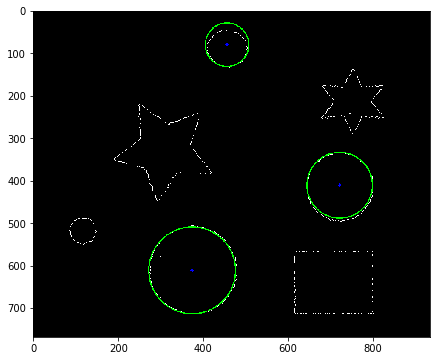

In [184]:
plt.figure(figsize=(18,6))
plt.imshow(output)

Você deve ter notado que um dos círculos mais à esquerda não foi detectado. Poderíamos tentar reforçar a imagem das bordas usando um kernel de convolução para realce de bordas (veja aula 2), ou ainda usar mais uma operação morfológica de dilatação.